<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/010(Multiclass_classification_Rock%2C_Paper_%26_Scissor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

####Loading Dataset

In [2]:
#Training Data
tf.keras.utils.get_file(origin="https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip",cache_dir="./", extract=True)

200682221/200682221 [==============================] - 2s 0us/step


'./datasets/rps.zip'

In [4]:
#Validation Data
tf.keras.utils.get_file(origin="https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip", cache_dir="./", extract=True)

29516758/29516758 [==============================] - 0s 0us/step


'./datasets/rps-test-set.zip'

In [5]:
training_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             rotation_range=0.2,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True,
                                                             fill_mode="nearest")

training_data=training_gen.flow_from_directory("datasets/rps/", target_size=(150,150), batch_size=20, class_mode="categorical")

valid_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
valid_data=valid_gen.flow_from_directory("datasets/rps-test-set/", target_size=(150,150), batch_size=10, class_mode="categorical")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


####Creating Model

In [7]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(150,150,3)),
                     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                     tf.keras.layers.MaxPooling2D(strides=(2,2)),

                     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
                     tf.keras.layers.MaxPooling2D(strides=(2,2)),

                     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
                     tf.keras.layers.MaxPooling2D(strides=(2,2)),

                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dropout(0.2),
                     tf.keras.layers.Dense(units=512, activation="relu"),
                     tf.keras.layers.Dense(units=3, activation="softmax")])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(training_data, epochs=10, validation_data=valid_data)

Epoch 1/10
126/126 [==============================] - 35s 191ms/step - loss: 1.9595 - accuracy: 0.4016 - val_loss: 1.0124 - val_accuracy: 0.3629
Epoch 2/10
126/126 [==============================] - 24s 190ms/step - loss: 0.8165 - accuracy: 0.6321 - val_loss: 0.3500 - val_accuracy: 0.9435
Epoch 3/10
126/126 [==============================] - 23s 185ms/step - loss: 0.4572 - accuracy: 0.8238 - val_loss: 0.1658 - val_accuracy: 0.9812
Epoch 4/10
126/126 [==============================] - 23s 181ms/step - loss: 0.2813 - accuracy: 0.9143 - val_loss: 0.0795 - val_accuracy: 0.9758
Epoch 5/10
126/126 [==============================] - 23s 180ms/step - loss: 0.2154 - accuracy: 0.9341 - val_loss: 0.0887 - val_accuracy: 0.9543
Epoch 6/10
126/126 [==============================] - 23s 180ms/step - loss: 0.1514 - accuracy: 0.9452 - val_loss: 0.1068 - val_accuracy: 0.9570
Epoch 7/10
126/126 [==============================] - 23s 180ms/step - loss: 0.0949 - accuracy: 0.9710 - val_loss: 0.0506 - val_ac

####Visualizing

Text(0.5, 1.0, 'Accuracy')

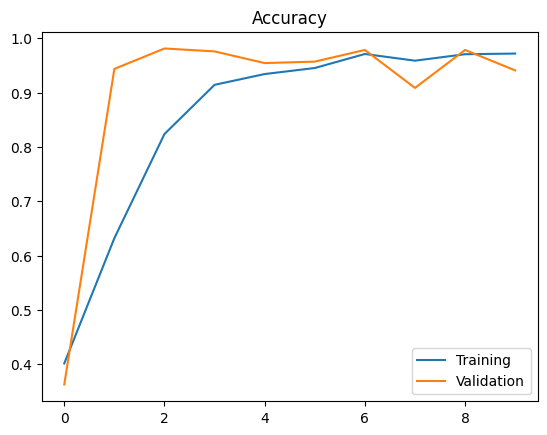

In [8]:
epochs=range(len(history.history["accuracy"]))
plt.plot(epochs, history.history["accuracy"], label="Training")
plt.plot(epochs, history.history["val_accuracy"], label="Validation")
plt.legend()
plt.title("Accuracy")